<a href="https://colab.research.google.com/github/LlakmalGamage/Commercial-Bank-Stock-Prediction-Using-LSTM-Deep-Learning-Mini-Project-02/blob/main/Stock_Prediction_version_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


importing data

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
commercial_path='/content/drive/My Drive/Data_Set_For_DL/Stock_Market/COMB_Historical_Data.csv'


In [5]:
data_set_1=pd.read_csv(commercial_path)


In [6]:
data_set_1.tail(10)


,Date,Price,Open,High,Low,Vol.,Change %
3465,07/22/2009,34.42,34.54,34.54,34.11,588.46K,1.09%
3466,07/21/2009,34.05,33.56,34.05,33.56,299.50K,2.41%
3467,07/20/2009,33.25,33.06,33.31,32.82,256.14K,1.50%
3468,07/17/2009,32.76,32.63,32.82,32.63,638.31K,0.21%
3469,07/16/2009,32.69,32.63,32.82,32.63,222.09K,0.00%
3470,07/15/2009,32.69,32.08,32.82,32.08,6.62M,1.90%
3471,07/14/2009,32.08,31.58,32.08,31.58,74.17K,1.78%
3472,07/13/2009,31.52,31.83,32.02,31.46,55.12K,-1.16%
3473,07/09/2009,31.89,32.08,32.08,31.21,511.87K,-0.96%
3474,07/08/2009,32.20,32.57,32.69,32.20,64.84K,-1.14%


In [7]:
data_set_1.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,02/19/2024,91.0,90.0,91.5,89.6,434.43K,1.22%
1,02/16/2024,89.9,89.0,90.0,89.0,169.15K,0.45%
2,02/15/2024,89.5,88.6,89.5,88.4,1.20M,1.02%
3,02/14/2024,88.6,89.0,89.0,88.5,25.95K,-1.01%
4,02/13/2024,89.5,89.9,89.9,88.8,803.45K,0.00%
5,02/12/2024,89.5,89.7,89.9,89.3,47.95K,0.00%
6,02/09/2024,89.5,89.5,89.5,88.8,154.75K,0.00%
7,02/08/2024,89.5,89.0,89.7,88.9,106.11K,0.56%
8,02/07/2024,89.0,88.0,89.0,88.0,98.73K,1.48%
9,02/06/2024,87.7,88.5,88.5,87.5,485.25K,-0.34%


In [8]:
data_set_2.tail(10)

,Date,Close/Last,Volume,Open,High,Low
2508,03/12/2010,$32.3714,103841951,$32.4814,$32.5328,$32.25
2509,03/11/2010,$32.2143,101209110,$31.9871,$32.2143,$31.9028
2510,03/10/2010,$32.12,148907755,$31.9757,$32.2114,$31.8857
2511,03/09/2010,$31.86,229908139,$31.1871,$32.1428,$31.1271
2512,03/08/2010,$31.2971,107326832,$31.43,$31.4414,$31.1786
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771
2517,03/01/2010,$29.8557,137312041,$29.3928,$29.9286,$29.35


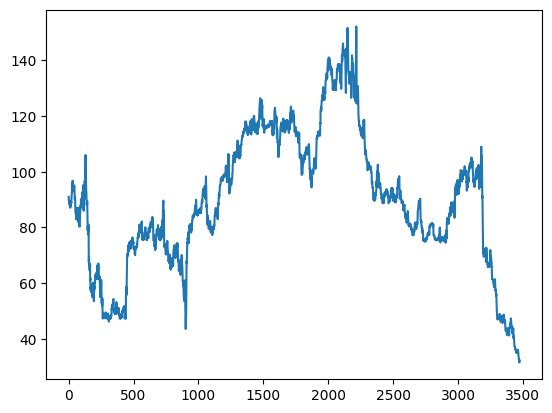

In [9]:
#close values dataset for commercial bank

closed_dataset_1=data_set_1.reset_index()['Price']
plt.plot(closed_dataset_1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
closed_dataset_1_scaled=scaler.fit_transform(np.array(closed_dataset_1).reshape(-1,1))

print(closed_dataset_1_scaled)
# closed_dataset_1_scaled=closed_dataset_1_scaled.flatten()
# plt.plot(closed_dataset_1_scaled)

[[0.49303714]
 [0.4839191 ]
 [0.48060345]
 ...
 [0.        ]
 [0.00306698]
 [0.0056366 ]]


In [11]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(closed_dataset_1_scaled, test_size=0.2, random_state=42)

print(len(train))

print(len(test))


2780
695


In [12]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return np.array(dataX), np.array(dataY)


In [13]:
time_step=365
X_train,Y_train=create_dataset(train,time_step)
X_test,Y_test=create_dataset(test,time_step)

In [14]:
print(X_train)

[[0.36994363 0.39754642 0.59955239 ... 0.39820955 0.41238395 0.70275199]
 [0.39754642 0.59955239 0.4952752  ... 0.41238395 0.70275199 0.93360411]
 [0.59955239 0.4952752  0.52254642 ... 0.70275199 0.93360411 0.2045756 ]
 ...
 [0.52776857 0.5369695  0.69570623 ... 0.71427387 0.59159483 0.38718501]
 [0.5369695  0.69570623 0.43037135 ... 0.59159483 0.38718501 0.45125995]
 [0.69570623 0.43037135 0.41818634 ... 0.38718501 0.45125995 0.62433687]]


In [15]:
print(X_train.shape),print(X_test.shape)

(2414, 365)
(329, 365)


(None, None)

In [16]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

print(X_train)



[[[0.36994363]
  [0.39754642]
  [0.59955239]
  ...
  [0.39820955]
  [0.41238395]
  [0.70275199]]

 [[0.39754642]
  [0.59955239]
  [0.4952752 ]
  ...
  [0.41238395]
  [0.70275199]
  [0.93360411]]

 [[0.59955239]
  [0.4952752 ]
  [0.52254642]
  ...
  [0.70275199]
  [0.93360411]
  [0.2045756 ]]

 ...

 [[0.52776857]
  [0.5369695 ]
  [0.69570623]
  ...
  [0.71427387]
  [0.59159483]
  [0.38718501]]

 [[0.5369695 ]
  [0.69570623]
  [0.43037135]
  ...
  [0.59159483]
  [0.38718501]
  [0.45125995]]

 [[0.69570623]
  [0.43037135]
  [0.41818634]
  ...
  [0.38718501]
  [0.45125995]
  [0.62433687]]]


In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(365,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 365, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 365, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=128,verbose=1)

Epoch 1/100
19/19 [==============================] - 26s 990ms/step - loss: 0.2046 - val_loss: 0.1186
Epoch 2/100
19/19 [==============================] - 19s 992ms/step - loss: 0.0777 - val_loss: 0.0404
Epoch 3/100
19/19 [==============================] - 19s 961ms/step - loss: 0.0445 - val_loss: 0.0407
Epoch 4/100
19/19 [==============================] - 17s 913ms/step - loss: 0.0423 - val_loss: 0.0404
Epoch 5/100
19/19 [==============================] - 18s 930ms/step - loss: 0.0423 - val_loss: 0.0405
Epoch 6/100
19/19 [==============================] - 20s 1s/step - loss: 0.0422 - val_loss: 0.0404
Epoch 7/100
19/19 [==============================] - 18s 974ms/step - loss: 0.0422 - val_loss: 0.0404
Epoch 8/100
19/19 [==============================] - 18s 969ms/step - loss: 0.0422 - val_loss: 0.0404
Epoch 9/100
19/19 [==============================] - 19s 959ms/step - loss: 0.0423 - val_loss: 0.0403
Epoch 10/100
19/19 [==============================] - 17s 927ms/step - loss: 0.0422 -

In [35]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)
print(train_prediction)

11/11 [==============================] - 1s 101ms/step
[[0.48523027]
 [0.48498794]
 [0.48508897]
 ...
 [0.4775794 ]
 [0.478444  ]
 [0.47923714]]


In [ ]:
train_prediction=scaler.inverse_transform(train_prediction)
test_prediction=scaler.inverse_transform(test_prediction)

print(train_prediction),print(len(train_prediction))

In [22]:
print(X_train)

[[[0.36994363]
  [0.39754642]
  [0.59955239]
  ...
  [0.39820955]
  [0.41238395]
  [0.70275199]]

 [[0.39754642]
  [0.59955239]
  [0.4952752 ]
  ...
  [0.41238395]
  [0.70275199]
  [0.93360411]]

 [[0.59955239]
  [0.4952752 ]
  [0.52254642]
  ...
  [0.70275199]
  [0.93360411]
  [0.2045756 ]]

 ...

 [[0.52776857]
  [0.5369695 ]
  [0.69570623]
  ...
  [0.71427387]
  [0.59159483]
  [0.38718501]]

 [[0.5369695 ]
  [0.69570623]
  [0.43037135]
  ...
  [0.59159483]
  [0.38718501]
  [0.45125995]]

 [[0.69570623]
  [0.43037135]
  [0.41818634]
  ...
  [0.38718501]
  [0.45125995]
  [0.62433687]]]


In [23]:
# print(train_prediction)
# train_prediction=train_prediction.flatten()
# plt.plot(train_prediction)

# test_prediction=test_prediction.flatten()
# plt.plot(test_prediction)

In [24]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_prediction))

88.92385904345169

In [25]:
 math.sqrt(mean_squared_error(Y_test,test_prediction))

88.5650663914755

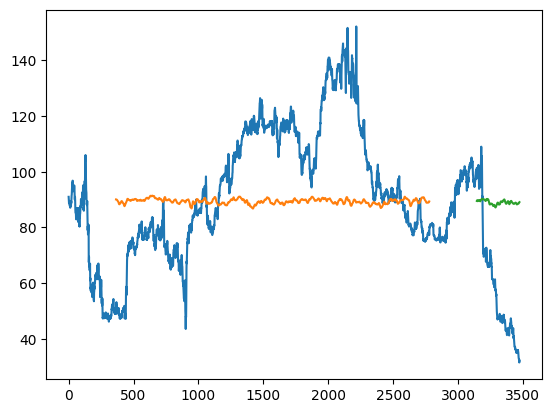

In [26]:
look_back = 365

trainPredictPlot = np.empty_like(closed_dataset_1_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_prediction) + look_back, :] = train_prediction

testPredictPlot = np.empty_like(closed_dataset_1_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_prediction) + (look_back * 2) + 1:len(closed_dataset_1_scaled) - 1, :] = test_prediction

plt.plot(scaler.inverse_transform(closed_dataset_1_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [27]:
len(test)

695

In [28]:
x_input=test[595:].reshape(1,-1)
x_input.shape

(1, 100)

In [29]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [30]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.47697675]
101
1 day input [0.37997347 0.48151525 0.58512931 0.45988064 0.62624337 0.30727785
 0.6751492  0.48740053 0.03680371 0.54111406 0.28556034 0.13759947
 0.3636439  0.31241711 0.18335544 0.70482427 0.70134284 0.72107095
 0.37665782 0.91445623 0.34706565 0.60659814 0.48740053 0.2878813
 0.68103448 0.70482427 0.37226459 0.56125663 0.31092507 0.6817805
 0.50041446 0.34963528 0.21037798 0.40459218 0.15359748 0.40077918
 0.71742374 0.55412798 0.32650862 0.63975464 0.48085212 0.13403515
 0.40517241 0.55760942 0.53498011 0.17796751 0.21369363 0.68708554
 0.50314987 0.81001326 0.40459218 0.16926393 0.23367042 0.37599469
 0.94877321 0.42100464 0.67506631 0.48806366 0.35369695 0.36596485
 0.51674403 0.46816976 0.61604775 0.39738064 0.46477122 0.36472149
 0.34888926 0.45200597 0.41752321 0.28945623 0.46676061 0.33595822
 0.51732427 0.18219496 0.37226459 0.61729111 0.9156996  0.38536141
 0.51732427 0.36787135 0.39182692 0.41105769 0.40459218 0.39290451
 0.46858422 0.47977454 0.41371021 0

In [31]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

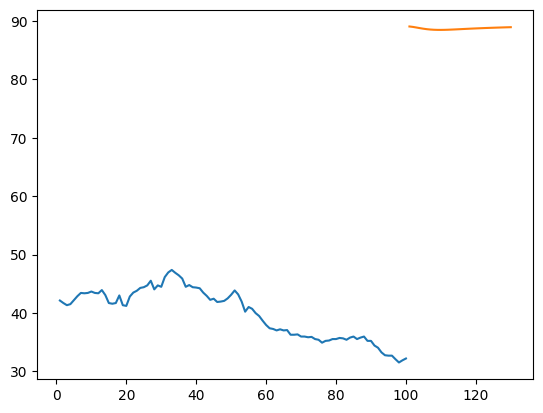

In [32]:
plt.plot(day_new,scaler.inverse_transform(closed_dataset_1_scaled[3375:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


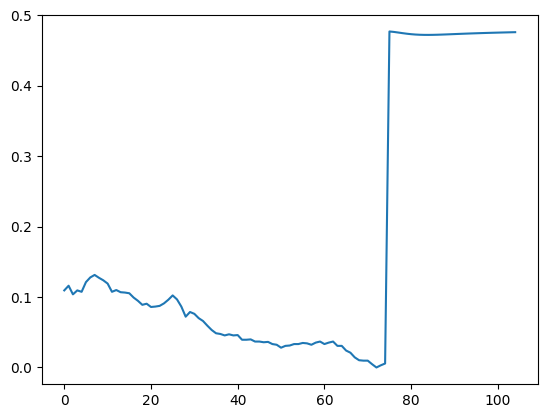

In [33]:
df3=closed_dataset_1_scaled.tolist()
df3.extend(lst_output)
plt.plot(df3[3400:])

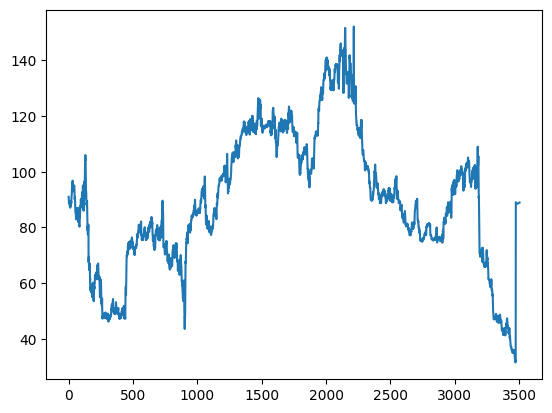

In [34]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)